In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## load joint info
JOINT_CSV_FILENAME = '/var/data/MET2/activity.csv'
IMG_PATH_PREFIX = '/var/data/MET2/'

numJoints = 14
# prepare column names 
colNames = list()
colNames.append('ID')
for n in range(numJoints):
    colNames.append("x{}".format(n+1))
    colNames.append("y{}".format(n+1))    
for n in range(numJoints):
    colNames.append("v{}".format(n+1))
#print(colNames)

# load csv file
MET2_joints=pd.read_csv(JOINT_CSV_FILENAME,header=None,names=colNames) # ,index_col=0)


MET2_joints.head()

,ID,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14
0,image/office activities/walking about/1.png,113,172,113,147,137,117,119,117,123,...,0,0,0,0,0,0,0,0,0,0
1,image/office activities/walking about/10.png,187,196,184,159,177,115,205,110,203,...,0,0,0,0,0,0,0,0,0,0
2,image/office activities/walking about/11.jpg,73,294,73,227,66,160,79,153,96,...,0,0,0,0,0,1,1,1,0,0
3,image/office activities/walking about/12.jpg,196,188,200,145,198,104,170,100,176,...,0,0,0,0,0,0,0,0,0,0
4,image/office activities/walking about/13.jpg,102,189,86,136,131,110,131,118,131,...,0,0,0,1,1,0,0,0,0,0


In [3]:
# dictionary of activity-MET  in the increasing order of MET

# 16 class model (960 samples)
# activity_MET = {"resting/sleeping" : 0.7,
#                 "resting/reclining" : 0.8, 
#                 "office activities/writing" : 1.0, 
#                 "office activities/reading.seated" : 1.0,
#                 "resting.seated.quiet" : 1.0, 
#                 "office activities/typing" : 1.1, 
#                 "resting/standing.relaxed" : 1.2, 
#                 "office activities/filing.seated" : 1.2, 
#                 "office activities/filing.stand" : 1.4,
#                 "miscellaneous occupational activity/cooking" : 1.6, 
#                 "office activities/walking about" : 1.7, 
#                 "miscellaneous occupational activity/machine work.sawing" : 1.8, 
#                 "miscellaneous occupational activity/machine work.light" : 2.0,
#                 "miscellaneous occupational activity/house cleaning" : 2.0, 
#                 "office activities/lifting.packing/lifting" : 2.1,
#                 "office activities/lifting.packing/packing" : 2.1
#                }

# 10 class model (600 samples)
activity_MET = {"resting/sleeping" : 0.7,
                "resting/reclining" : 0.8, 
                "office activities/writing" : 1.0, 
                "office activities/reading.seated" : 1.0,
                "resting.seated.quiet" : 1.0, 
                "office activities/typing" : 1.1, 
                "resting/standing.relaxed" : 1.2, 
                "office activities/filing.seated" : 1.2, 
                "office activities/filing.stand" : 1.4,
                "office activities/walking about" : 1.7, 
               }


In [4]:
# add MET and count the number of each activity
ID=MET2_joints["ID"]

MET2_joints['MET'] = np.NaN

METs = list()
for act in activity_MET:

    met = activity_MET[act]
    METs.append(met)
    
    idx = ID.str.contains(act)
    MET2_joints["MET"][idx] = met
    
    
    count = sum(idx)    
    print("{} : MET={}, {} samples".format(act,met,count))

    
    
print(METs)


    

# drop na
MET2_joints.dropna(inplace=True)
MET2_joints.reset_index(drop=True, inplace=True)    # MUST RE-INDEX AFTER DROPNA!!!

MET2_joints.head()


/home/yyoo/tf3/lib/python3.5/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


resting/standing.relaxed : MET=1.2, 60 samples
office activities/walking about : MET=1.7, 60 samples
resting.seated.quiet : MET=1.0, 60 samples
office activities/reading.seated : MET=1.0, 60 samples
resting/sleeping : MET=0.7, 60 samples
resting/reclining : MET=0.8, 60 samples
office activities/filing.stand : MET=1.4, 60 samples
office activities/typing : MET=1.1, 60 samples
office activities/writing : MET=1.0, 60 samples
office activities/filing.seated : MET=1.2, 60 samples
[1.2, 1.7, 1.0, 1.0, 0.7, 0.8, 1.4, 1.1, 1.0, 1.2]


,ID,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,v6,v7,v8,v9,v10,v11,v12,v13,v14,MET
0,image/office activities/walking about/1.png,113,172,113,147,137,117,119,117,123,...,0,0,0,0,0,0,0,0,0,1.7
1,image/office activities/walking about/10.png,187,196,184,159,177,115,205,110,203,...,0,0,0,0,0,0,0,0,0,1.7
2,image/office activities/walking about/11.jpg,73,294,73,227,66,160,79,153,96,...,0,0,0,0,1,1,1,0,0,1.7
3,image/office activities/walking about/12.jpg,196,188,200,145,198,104,170,100,176,...,0,0,0,0,0,0,0,0,0,1.7
4,image/office activities/walking about/13.jpg,102,189,86,136,131,110,131,118,131,...,0,0,1,1,0,0,0,0,0,1.7


In [5]:
# assign label

ID=MET2_joints["ID"]
MET2_joints['label'] = np.NaN


label = 0
labels = list()
for act in activity_MET:
    idx = ID.str.contains(act)
    
    MET2_joints["label"][idx] = int(label)
    labels.append(label)

    count = sum(idx)    
    print("{} : label={}, {} samples".format(act,label,count))

    label = label + 1
    
    
MET2_joints["label"] = MET2_joints["label"].astype('int').astype('category')    

print(labels)

print(MET2_joints.shape)
MET2_joints.info()


resting/standing.relaxed : label=0, 60 samples
office activities/walking about : label=1, 60 samples
resting.seated.quiet : label=2, 60 samples
office activities/reading.seated : label=3, 60 samples
resting/sleeping : label=4, 60 samples
resting/reclining : label=5, 60 samples


/home/yyoo/tf3/lib/python3.5/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


office activities/filing.stand : label=6, 60 samples
office activities/typing : label=7, 60 samples
office activities/writing : label=8, 60 samples
office activities/filing.seated : label=9, 60 samples
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
(600, 45)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 45 columns):
ID       600 non-null object
x1       600 non-null int64
y1       600 non-null int64
x2       600 non-null int64
y2       600 non-null int64
x3       600 non-null int64
y3       600 non-null int64
x4       600 non-null int64
y4       600 non-null int64
x5       600 non-null int64
y5       600 non-null int64
x6       600 non-null int64
y6       600 non-null int64
x7       600 non-null int64
y7       600 non-null int64
x8       600 non-null int64
y8       600 non-null int64
x9       600 non-null int64
y9       600 non-null int64
x10      600 non-null int64
y10      600 non-null int64
x11      600 non-null int64
y11      600 non-null int64
x12    

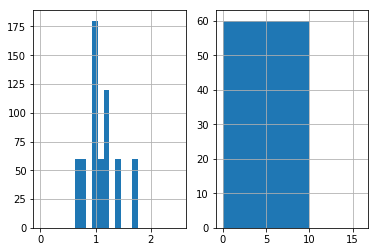

In [6]:

#MET2_joints[["MET","label"]].describe()
#MET2_joints["MET"].value_counts
#MET2_joints["label"].value_counts

plt.subplot(121)
MET2_joints["MET"].hist(bins=np.linspace(0., 2.5,25))
plt.subplot(122)
MET2_joints["label"].hist(bins=np.linspace(0., 16, 17))

In [7]:
#MET2_joints.info()
MET2_joints.to_csv("activity_wo.csv", index = False, header = False)

In [8]:
# count labels
label_bin = np.linspace(0,10,11)-1
MET2_joints["label"].value_counts(bins=label_bin, sort=False)


(-1.001, 0.0]    60
(0.0, 1.0]       60
(1.0, 2.0]       60
(2.0, 3.0]       60
(3.0, 4.0]       60
(4.0, 5.0]       60
(5.0, 6.0]       60
(6.0, 7.0]       60
(7.0, 8.0]       60
(8.0, 9.0]       60
Name: label, dtype: int64

In [9]:
# Now let's shuffle!


from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=42)

k = 1
for train_index, test_index in split.split(MET2_joints, MET2_joints["label"]):
    #print(train_index)
    #print(test_index)
    
    strat_train_set = MET2_joints.loc[train_index]
    filename = "activity_wo_train_k{}.csv".format(k)
    #print(len(strat_train_set))
    strat_train_set.to_csv(filename, index = False, header = False)
    
    
    strat_test_set = MET2_joints.loc[test_index]
    filename = "activity_wo_test_k{}.csv".format(k)    
    strat_test_set.to_csv(filename, index = False, header = False)    
    #print(len(strat_test_set))    
    
    print(strat_train_set["label"].value_counts(sort=False))
    print(strat_test_set["label"].value_counts(sort=False))
    
    k = k +1
    

0    54
1    54
2    54
3    54
4    54
5    54
6    54
7    54
8    54
9    54
Name: label, dtype: int64
0    6
1    6
2    6
3    6
4    6
5    6
6    6
7    6
8    6
9    6
Name: label, dtype: int64
0    54
1    54
2    54
3    54
4    54
5    54
6    54
7    54
8    54
9    54
Name: label, dtype: int64
0    6
1    6
2    6
3    6
4    6
5    6
6    6
7    6
8    6
9    6
Name: label, dtype: int64
0    54
1    54
2    54
3    54
4    54
5    54
6    54
7    54
8    54
9    54
Name: label, dtype: int64
0    6
1    6
2    6
3    6
4    6
5    6
6    6
7    6
8    6
9    6
Name: label, dtype: int64
0    54
1    54
2    54
3    54
4    54
5    54
6    54
7    54
8    54
9    54
Name: label, dtype: int64
0    6
1    6
2    6
3    6
4    6
5    6
6    6
7    6
8    6
9    6
Name: label, dtype: int64
0    54
1    54
2    54
3    54
4    54
5    54
6    54
7    54
8    54
9    54
Name: label, dtype: int64
0    6
1    6
2    6
3    6
4    6
5    6
6    6
7    6
8    6
9    6
Name: label, dty

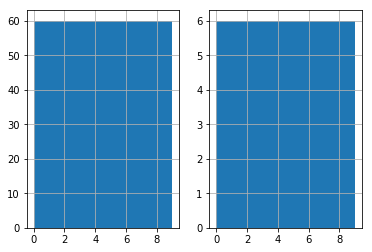

In [10]:
# TO CHECK 

#print(strat_train_set["label"].value_counts(bins=labels, sort=False))
#print(strat_test_set["label"].value_counts(bins=labels, sort=False))

plt.subplot(121)
MET2_joints["label"].hist()
plt.subplot(122)
strat_test_set["label"].hist()


In [11]:
len(strat_train_set)

540